In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:20,.2f}'.format
import matplotlib.pyplot as plt
import string
import random

# Downloading NLP library (nltk, gensim, reg-ex, word cloud)
import re
from gensim.utils import simple_preprocess
from gensim.models import LdaMulticore
import gensim.corpora as corpora
from nltk.corpus import stopwords
from wordcloud import WordCloud

# TODO LIST (April 1st, 2022) 

1. Identify different frequencies of words in each video. Normalize per total words. 
2. Identify words that have highest weight for each video. Pick most common topics between the two.
3. Descriptive statisitcs for each class (Done)
4. Try LASSO sparse regression on all variables Xiao used.
5. Remove transition words and handle weird cases. 

In [2]:
df600 = pd.read_csv("merged_and_cleaned600.csv", sep = ",").drop(columns = ["Unnamed: 0"])

# Topic Modelling

In [19]:
# Eliminate videos without subtitles
df600 = pd.read_csv("merged_and_cleaned600.csv", sep = ",").drop(columns = ["Unnamed: 0"])
df600 = df600[df600["subtitle"] != "[]"]


In [40]:
# Create a function to perform topic modelling. 
# TODO: Ask if there's any word we should remove from the caption
# NOTE: Problems with cleanText.
def cleanText(text, stopword_lst, return_string = False):
    """
    @param text: A string of text to clean by removing punctuations, stopwords, and splitting bad tails.
    @param stopword_lst: A list of words we wish to remove. Usually used the list of stopwords in nltk + sth.
    @param return_string: A Boolean indicating we want to return a list of words or a long string. 
    Return: A list of keywords for each sentence
    NOTE: Use return_string = True for word cloud; False for topic modelling (bag of words).
    """
    text_lst = str(text).split("\\n") # Youtube subtitle denotes lines as \\n, so cannot directly remove punctuations.
    temp = []
    # Create a list of words for each video's subtitle, excluding all stopwords. 
    for text in text_lst:
        temp += [word for word in simple_preprocess(text, deacc=True) if word not in stopword_lst]
    # For word cloud or topic modelling.
    if return_string:
        return ' '.join(temp)
    return temp

def generateWordCloud(df, col_name, stopword_lst = [], to_file = False, filename = ""):
    """
    @param df: A dataframe whose column consists of texts we want to clean
    @param col_name: A string of column name whose value is a text we want to clean. 
    @param stopword_lst: A list of words to exclude from our model
    @param to_file: A boolean denoting whether we save the word cloud or not.
    @param filename: A string denoting name of files we save (check if to_file == True)
    Usage: Generate a word cloud showing the most frequent words appearing in columns of text.
    NOTE: To generate a word cloud for a specific video, simply index by conditions,
    such as video_id, channel creator, understandable, actionable, etc.
    """
    assert col_name in df.columns.tolist()
    # Pre-process the text into long string.
    text = ""
    for video_subtitle in df[col_name].tolist():
        text += cleanText(video_subtitle, stopword_lst, return_string = True) 
        
    # Generate a word cloud
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    wordcloud.generate(text)
    # Visualize a word cloud
    wordcloud.to_image()
    plt.figure(figsize = (9,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    if to_file:
        assert len(filename) >= 1 # Ensure we save into legitimate filenames
        print("Saving %s" %(filename))
        wordcloud.to_file(filename)

In [33]:
stopword_lst = list(set(stopwords.words('english'))) 
stopword_lst += ["nof","nthe", "one", "thing", "quot"]

colloquial = ["see","going","know", "go", "really"]
stopword_lst += colloquial

In [6]:
# Building a bag of subtitles for each video
# See https://radimrehurek.com/gensim/corpora/dictionary.html
# See https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
def topicModelling():
    # Create corpora of words
    pass

temp = df600[df600["info"] == 1]["subtitle"]
# Create a list of words for each video subtitle. 
subtitle_lst = [cleanText(subtitle, stopword_lst, return_string = False) for subtitle in temp]
# Convert each word into dictionary. This allows us to perform mapping in the future.
id2word = corpora.Dictionary(subtitle_lst)
# Build a corpus in term document frequency
corpus = [id2word.doc2bow(subtitle) for subtitle in subtitle_lst]

# number of topics
num_topics = 3
# Build LDA model
lda_model = LdaMulticore(corpus=corpus,id2word=id2word, num_topics=num_topics)

# Print the Keyword in the topics
# Possible interpretation: Different aspects of diabetes.
# Word counts on two classes
for i in range(len(lda_model.print_topics())):
    print(lda_model.print_topics()[i])
    
# TODO: Account for frequencies in video duration.

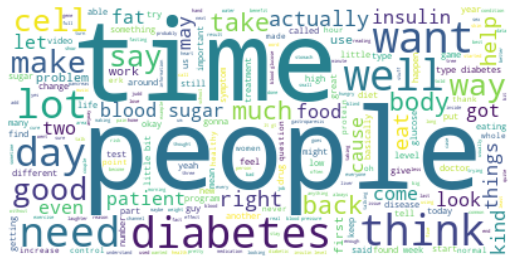

Saving wordcloud_NOT_info.png


In [43]:
# Word cloud for I(dependent) = 0.
dependent = "info"
nu_df = df600[df600[dependent] == 0]
filename = "wordcloud_NOT_%s.png" %(dependent)
generateWordCloud(nu_df, "subtitle", stopword_lst = stopword_lst, to_file = True, filename = filename) 

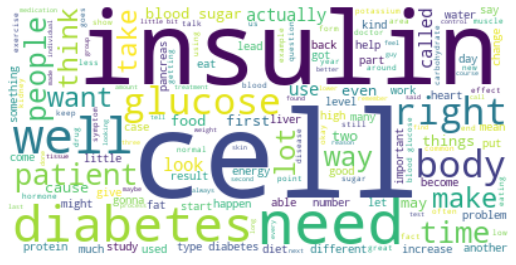

Saving wordcloud_info.png


In [44]:
# Word cloud for I(dependent) = 1.
u_df = df600[df600[dependent] == 1]
filename = "wordcloud_%s.png" %(dependent)
generateWordCloud(u_df, "subtitle", stopword_lst = stopword_lst, to_file = True, filename = filename)

In [40]:
from helper_fn import *

In [34]:
truncateColumn(df600, 0, 10, "Kincaid")

In [39]:
df600

URL  Duration                 info  action  understand  \
0    -32U9eU1hdM       310                 1.00       0           1   
1    -71ld0iqAq8       602                 1.00       0           1   
2    -8HmZjScLe0       732                 0.00       0           0   
3    -Aj5BTnz-v0       559                 1.00       1           1   
4    -IaysvX1L8U       246                 1.00       0           1   
..           ...       ...                  ...     ...         ...   
616  zLbAxztnnfE       163                 0.00       0           0   
617  zPdwsCTp4gM       751                 1.00       0           1   
618  zU-5GcqzHNM       819                 1.00       1           1   
619  z_3S2_41_FE       300                 1.00       0           1   
620  zsVRO4IZoFw       171                 0.00       1           1   

                     ARI     FleshReadingEase              Kincaid  \
0                  14.52                28.51                10.00   
1                   9.06                52.87                 8.75   
2                  21.83                70.67                10.00   
3                  15.78                25.99                10.00   
4                  12.51                45.13                10.00   
..                   ...                  ...                  ...   
616                19.30                19.81                10.00   
617                 8.49                65.03                 7.58   
618                16.95                62.72                10.00   
619                 9.27                75.98                 7.75   
620                20.22                29.53                10.00   

             active_verb      has_description  ... topicIds  \
0                  59.00                 1.00  ...      NaN   
1                  31.00                 1.00  ...      NaN   
2                  42.00                 1.00  ...      NaN   
3                  23.00                 1.00  ...      NaN   
4                  16.00                 1.00  ...      NaN   
..                   ...                  ...  ...      ...   
616                77.00                 1.00  ...      NaN   
617                 6.00                 1.00  ...      NaN   
618                17.00                 1.00  ...      NaN   
619                32.00                 1.00  ...      NaN   
620               119.00                 1.00  ...      NaN   

     comment_total_words  postive_comment_count  keyword_title_cosine  \
0                 290.00                  14.00                  0.00   
1                   0.00                   0.00                  0.00   
2               3,603.00                  90.00                  0.28   
3                 261.00                   9.00                  0.28   
4                 104.00                   3.00                  0.19   
..                   ...                    ...                   ...   
616                 0.00                   0.00                  0.00   
617                70.00                   1.00                  0.47   
618             5,239.00                  47.00                  0.07   
619             2,684.00                  38.00                  0.00   
620               604.00                   5.00                  0.62   

     comment_description_cosine  comment_unique_words  \
0                          2.53                257.00   
1                          0.00                  0.00   
2                          3.22              2,789.00   
3                          1.23                234.00   
4                          0.27                 95.00   
..                          ...                   ...   
616                        0.00                  0.00   
617                        0.09                 54.00   
618                        8.14              3,715.00   
619                        8.46              2,178.00   
620                        1.22                421.00   



<function helper_fn.truncateColumn(df, lower_bound, upper_bound, col_name)>